<a href="https://colab.research.google.com/github/IshitaOberoi/VehicleDetectionsystem/blob/main/vehicle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
!pip install -U ipywidgets
!pip install -U ultralytics ray
!pip install --upgrade ray
!pip install --upgrade ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 95.4MB/s]


In [5]:
image_path = 'sample_image.jpg'

In [8]:
results = model.predict(source=image_path,
                        imgsz=640,
                        conf=0.5)


image 1/1 /content/sample_image.jpg: 384x640 5 cars, 50.1ms
Speed: 12.0ms preprocess, 50.1ms inference, 369.3ms postprocess per image at shape (1, 3, 384, 640)


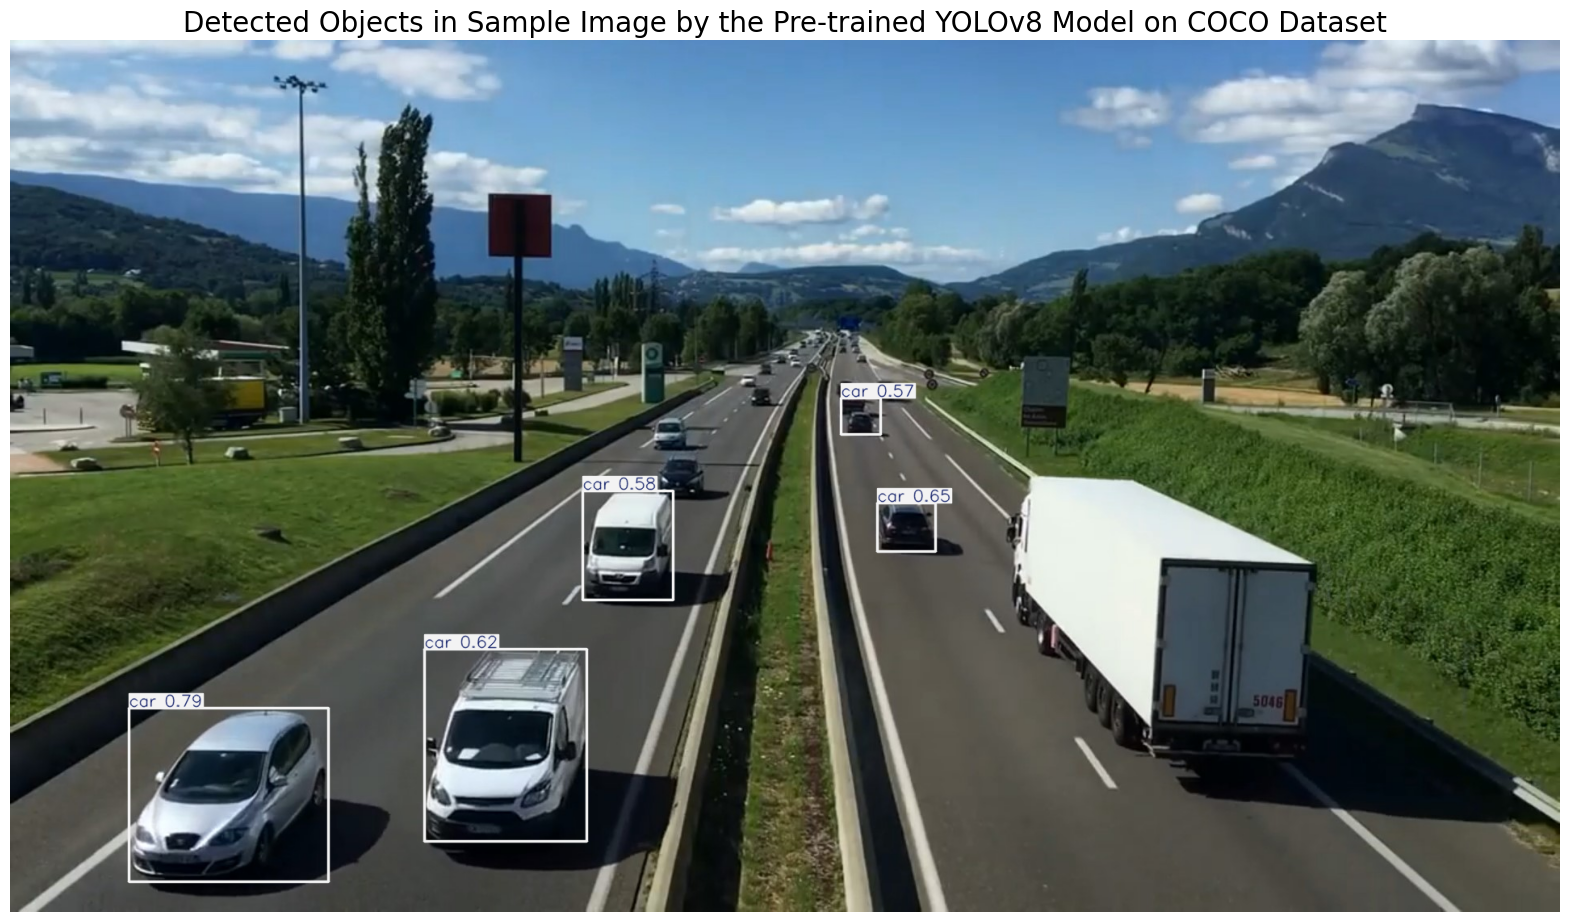

In [9]:
sample_image = results[0].plot(line_width=2)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Pre-trained YOLOv8 Model on COCO Dataset', fontsize=20)
plt.axis('off')
plt.show()

In [18]:
import zipfile
import os

# Define the zip file path and extraction location
zip_path = '/content/vehicle_ds.zip'
extract_to = '/content/vehicle_ds'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Confirm extraction and list contents
print(f"Extracted to: {extract_to}")
for root, dirs, files in os.walk(extract_to):
    print(f"\n Folder: {root}")
    print(f" Subfolders: {dirs}")
    print(f" Files: {files}")


Extracted to: /content/vehicle_ds

 Folder: /content/vehicle_ds
 Subfolders: ['Vehicle_Detection_Image_Dataset']
 Files: []

 Folder: /content/vehicle_ds/Vehicle_Detection_Image_Dataset
 Subfolders: ['valid', 'train']
 Files: ['data.yaml', 'README.roboflow.txt', 'sample_video.mp4', 'README.dataset.txt', 'sample_image.jpg']

 Folder: /content/vehicle_ds/Vehicle_Detection_Image_Dataset/valid
 Subfolders: ['images', 'labels']
 Files: []

 Folder: /content/vehicle_ds/Vehicle_Detection_Image_Dataset/valid/images
 Subfolders: []
 Files: ['2_mp4-5_jpg.rf.bb490ff3835ac898dedea95c973038f5.jpg', 'test_mp4-15_jpg.rf.2e20880f4bc2ad6347a6a98e8f4ef849.jpg', '3_mp4-2_jpg.rf.fb3ec30812baf2bbaca8718878601bde.jpg', '12_mp4-2_jpg.rf.079207e8096200ec6c611a449898ad40.jpg', '6_mp4-31_jpg.rf.c786274ab129629ca618e454b4146f11.jpg', 'test_mp4-2_jpg.rf.7aa04dc29802950b7aa81fd4f5cc5d7c.jpg', 'test3_mp4-8_jpg.rf.8223a2cf9be640b80ee97b8c3e46d8c3.jpg', '14_mp4-5_jpg.rf.56b529ccef99d8c81d68610e5a5e3929.jpg', '6_mp4-2

In [19]:
import os
import yaml

yaml_path = '/content/vehicle_ds/Vehicle_Detection_Image_Dataset/data.yaml'



In [20]:
with open(yaml_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Vehicle
nc: 1
roboflow:
  license: CC BY 4.0
  project: vehicle_detection_yolov8
  url: https://universe.roboflow.com/farzad/vehicle_detection_yolov8/dataset/3
  version: 3
  workspace: farzad
train: ../train/images
val: ../valid/images



In [24]:
dataset_path='/content/vehicle_ds/Vehicle_Detection_Image_Dataset'
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

In [22]:
num_train_images = 0
num_valid_images = 0
train_image_sizes = set()
valid_image_sizes = set()

In [25]:
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

In [26]:
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

In [27]:
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

Number of training images: 536
Number of validation images: 90


In [28]:
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

All training images have the same size: (640, 640)


In [29]:
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

All validation images have the same size: (640, 640)


In [30]:
image_files = [file for file in os.listdir(train_images_path) if file.endswith('.jpg')]
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 8)]

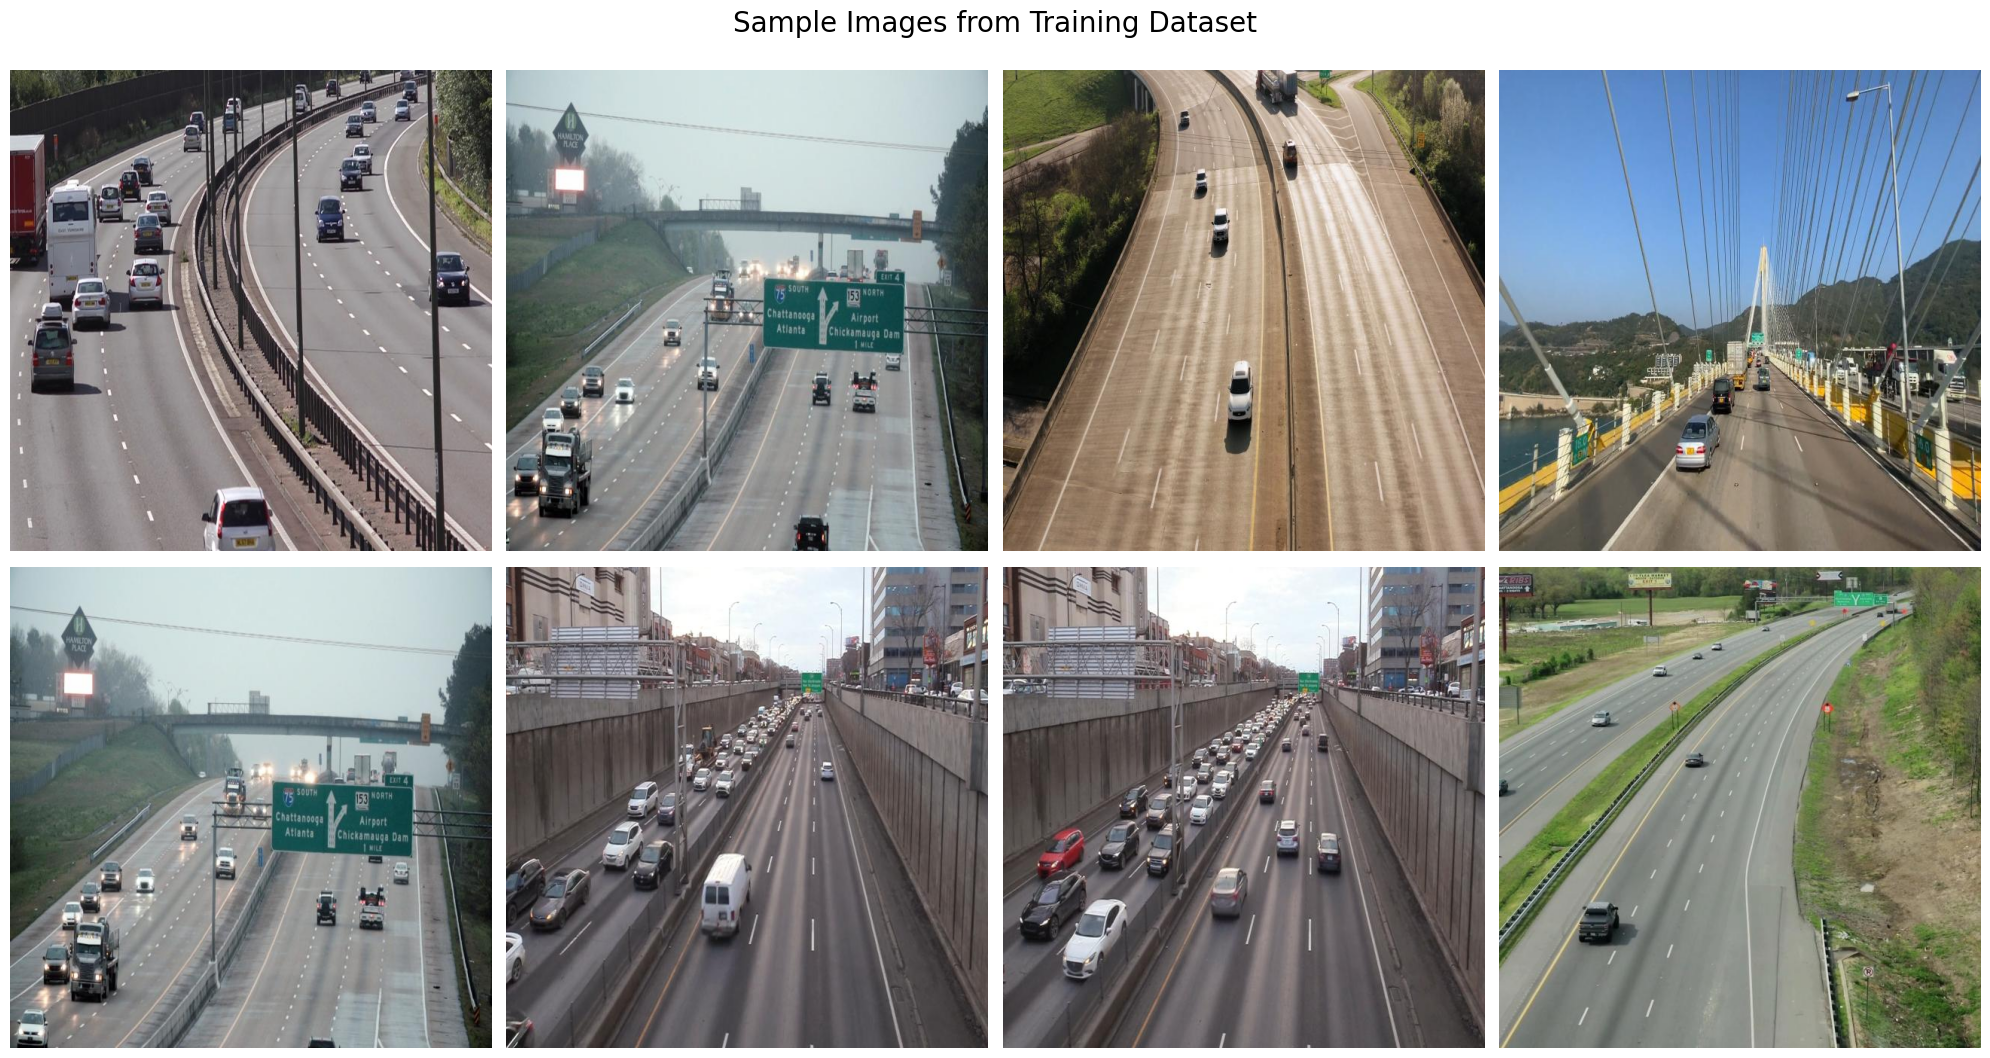

In [31]:
fig, axes = plt.subplots(2, 4, figsize=(20, 11))

for ax, img_file in zip(axes.ravel(), selected_images):
    img_path = os.path.join(train_images_path, img_file)
    image = Image.open(img_path)
    ax.imshow(image)
    ax.axis('off')

plt.suptitle('Sample Images from Training Dataset', fontsize=20)
plt.tight_layout()
plt.show()

In [32]:
results = model.train(
    data=yaml_path,
    epochs=100,
    imgsz=640,
    device=0,
    patience=50,
    batch=32,
    optimizer='auto',
    lr0=0.0001,
    lrf=0.1,
    dropout=0.1,
    seed=0
)

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/vehicle_ds/Vehicle_Detection_Image_Dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0, pl

100%|██████████| 755k/755k [00:00<00:00, 18.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1800.7±470.9 MB/s, size: 57.5 KB)


train: Scanning /content/vehicle_ds/Vehicle_Detection_Image_Dataset/train/labels... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<00:00, 2256.30it/s]

train: New cache created: /content/vehicle_ds/Vehicle_Detection_Image_Dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 572.6±305.5 MB/s, size: 57.6 KB)


val: Scanning /content/vehicle_ds/Vehicle_Detection_Image_Dataset/valid/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 1884.36it/s]

val: New cache created: /content/vehicle_ds/Vehicle_Detection_Image_Dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.02G      2.419      2.965      1.849        420        640: 100%|██████████| 17/17 [00:10<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]

                   all         90        937      0.003     0.0864    0.00212   0.000678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.36G      1.528      1.291      1.205        359        640: 100%|██████████| 17/17 [00:07<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         90        937     0.0063      0.181     0.0167    0.00766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.38G      1.305     0.9842      1.064        330        640: 100%|██████████| 17/17 [00:08<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         90        937      0.898      0.636      0.741      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       5.4G      1.243     0.9217      1.043        368        640: 100%|██████████| 17/17 [00:08<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         90        937      0.843      0.825      0.899      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.41G      1.207     0.8574      1.025        288        640: 100%|██████████| 17/17 [00:07<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         90        937      0.812      0.834      0.892      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.43G      1.173     0.8118      1.014        357        640: 100%|██████████| 17/17 [00:07<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         90        937      0.844      0.906      0.933      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.45G      1.131     0.7518      0.998        416        640: 100%|██████████| 17/17 [00:08<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         90        937      0.848      0.892       0.94      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.46G      1.132     0.7323      1.004        486        640: 100%|██████████| 17/17 [00:08<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         90        937      0.878      0.906      0.949      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.48G      1.111     0.7092     0.9892        475        640: 100%|██████████| 17/17 [00:07<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         90        937      0.821      0.915      0.903      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       5.5G      1.122      0.708     0.9898        270        640: 100%|██████████| 17/17 [00:07<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         90        937      0.863      0.895      0.936      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.52G      1.078       0.68     0.9764        287        640: 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         90        937      0.865      0.928      0.955      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.53G      1.109     0.6739     0.9894        322        640: 100%|██████████| 17/17 [00:08<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         90        937      0.887        0.9      0.956       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.55G      1.064     0.6402     0.9658        391        640: 100%|██████████| 17/17 [00:07<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         90        937       0.87      0.919       0.96      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.57G      1.068     0.6471     0.9684        382        640: 100%|██████████| 17/17 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         90        937      0.892      0.917      0.963      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.58G       1.05     0.6353     0.9704        349        640: 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         90        937      0.916      0.898      0.965      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       5.6G      1.044     0.6282     0.9635        213        640: 100%|██████████| 17/17 [00:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         90        937      0.859      0.908      0.952      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.62G       1.06     0.6211     0.9707        455        640: 100%|██████████| 17/17 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all         90        937      0.873      0.918      0.957       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.64G      1.022     0.6007     0.9592        315        640: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         90        937      0.921      0.886      0.965      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.65G      1.055     0.6089     0.9715        220        640: 100%|██████████| 17/17 [00:07<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         90        937      0.901      0.911      0.968      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.67G      1.042     0.6046     0.9669        335        640: 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         90        937      0.866      0.921      0.959      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.69G      1.026     0.5876      0.959        276        640: 100%|██████████| 17/17 [00:07<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all         90        937      0.898      0.908      0.958      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       5.7G      1.022     0.5746     0.9463        325        640: 100%|██████████| 17/17 [00:07<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         90        937      0.892       0.91      0.962      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.72G      1.014     0.5799     0.9573        265        640: 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         90        937      0.902      0.924      0.967      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.74G      1.003     0.5692     0.9538        284        640: 100%|██████████| 17/17 [00:08<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         90        937      0.892       0.94      0.968      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.76G       1.01     0.5713     0.9531        325        640: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         90        937       0.92      0.919      0.974      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.77G     0.9959     0.5645     0.9529        377        640: 100%|██████████| 17/17 [00:07<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         90        937      0.919      0.902      0.968      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.79G     0.9894      0.586     0.9479        232        640: 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         90        937      0.933      0.897      0.973      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.81G     0.9878     0.5546     0.9464        416        640: 100%|██████████| 17/17 [00:08<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         90        937      0.866      0.936      0.954       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.82G     0.9959      0.562      0.949        366        640: 100%|██████████| 17/17 [00:07<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         90        937      0.924      0.928      0.972      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.84G     0.9795     0.5553     0.9442        402        640: 100%|██████████| 17/17 [00:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         90        937      0.904      0.919      0.972       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.86G     0.9823     0.5502     0.9435        213        640: 100%|██████████| 17/17 [00:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         90        937      0.912       0.92      0.969      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.88G     0.9724     0.5333     0.9418        444        640: 100%|██████████| 17/17 [00:07<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         90        937      0.921      0.927      0.974      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.89G     0.9598     0.5271     0.9404        336        640: 100%|██████████| 17/17 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         90        937      0.922      0.909      0.968      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.91G     0.9726      0.528     0.9342        310        640: 100%|██████████| 17/17 [00:07<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         90        937      0.898      0.923      0.971      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.93G     0.9699     0.5327     0.9355        322        640: 100%|██████████| 17/17 [00:08<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         90        937       0.92      0.919      0.975      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.94G     0.9771       0.54     0.9426        337        640: 100%|██████████| 17/17 [00:07<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         90        937      0.925       0.93      0.974      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.96G     0.9671     0.5217     0.9373        245        640: 100%|██████████| 17/17 [00:07<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         90        937      0.892      0.926      0.966      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.98G     0.9431      0.523     0.9298        330        640: 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         90        937      0.901      0.906      0.963      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.99G     0.9605     0.5323     0.9345        255        640: 100%|██████████| 17/17 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         90        937      0.912       0.92       0.97      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.01G     0.9506     0.5263     0.9282        403        640: 100%|██████████| 17/17 [00:07<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         90        937      0.902       0.93      0.971      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.03G     0.9444      0.518     0.9308        352        640: 100%|██████████| 17/17 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         90        937      0.915      0.946      0.975      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.04G     0.9433     0.5164     0.9331        354        640: 100%|██████████| 17/17 [00:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         90        937      0.922      0.927      0.973      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.06G     0.9437     0.5125     0.9304        298        640: 100%|██████████| 17/17 [00:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         90        937      0.938      0.922      0.977      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.08G     0.9479     0.5218     0.9265        458        640: 100%|██████████| 17/17 [00:07<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         90        937      0.903      0.944      0.974      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       6.1G     0.9283     0.5048     0.9268        352        640: 100%|██████████| 17/17 [00:07<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         90        937      0.912      0.936      0.973       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.12G      0.923      0.498     0.9274        376        640: 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         90        937      0.926      0.911      0.968      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.13G       0.93     0.5115     0.9271        326        640: 100%|██████████| 17/17 [00:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         90        937        0.9      0.933       0.97      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.15G     0.9349     0.5147     0.9261        364        640: 100%|██████████| 17/17 [00:07<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         90        937      0.918      0.921      0.975       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.16G      0.926     0.5054     0.9244        336        640: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         90        937       0.92      0.922      0.969      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.18G     0.9209     0.4998     0.9191        310        640: 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         90        937      0.923      0.926      0.973      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       6.2G     0.9323     0.5023     0.9306        295        640: 100%|██████████| 17/17 [00:08<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         90        937      0.906      0.923      0.971      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.22G     0.9173     0.4952     0.9269        395        640: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all         90        937      0.928      0.915      0.973      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.23G      0.911     0.4948     0.9232        385        640: 100%|██████████| 17/17 [00:07<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         90        937      0.903      0.942      0.976      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.25G     0.9273     0.4921     0.9239        332        640: 100%|██████████| 17/17 [00:08<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         90        937      0.934      0.922      0.976      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.27G     0.9019     0.4838     0.9161        417        640: 100%|██████████| 17/17 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         90        937      0.912      0.945      0.975      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.29G     0.8998     0.4833     0.9225        233        640: 100%|██████████| 17/17 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         90        937      0.913      0.932      0.972      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       6.3G      0.909     0.4834      0.929        274        640: 100%|██████████| 17/17 [00:07<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         90        937      0.915      0.932      0.972      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.32G     0.9173     0.4924     0.9251        406        640: 100%|██████████| 17/17 [00:07<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         90        937      0.924      0.918      0.974      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.34G     0.9091      0.484     0.9161        380        640: 100%|██████████| 17/17 [00:08<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         90        937      0.904       0.93       0.97      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.35G     0.9051     0.4825     0.9257        368        640: 100%|██████████| 17/17 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         90        937      0.933      0.926      0.978      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.37G     0.8978     0.4836     0.9184        349        640: 100%|██████████| 17/17 [00:07<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         90        937      0.909      0.943       0.97      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.39G     0.9032     0.4827      0.914        295        640: 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         90        937      0.932      0.926      0.975       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       6.4G     0.8898     0.4674     0.9167        282        640: 100%|██████████| 17/17 [00:07<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         90        937      0.903      0.942      0.973       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.42G     0.9044     0.4772     0.9161        262        640: 100%|██████████| 17/17 [00:07<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         90        937      0.919       0.94      0.977      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.44G     0.8919     0.4671     0.9125        450        640: 100%|██████████| 17/17 [00:07<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         90        937       0.91      0.931      0.971      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.46G     0.8926     0.4718     0.9191        297        640: 100%|██████████| 17/17 [00:08<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         90        937      0.923      0.936      0.975      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.47G     0.8799     0.4618     0.9133        310        640: 100%|██████████| 17/17 [00:08<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         90        937      0.923      0.937      0.975      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.49G     0.8744     0.4571     0.9097        279        640: 100%|██████████| 17/17 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         90        937      0.922      0.938      0.975      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.51G     0.8805     0.4648     0.9117        380        640: 100%|██████████| 17/17 [00:07<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         90        937      0.922       0.94      0.976      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.52G     0.8798     0.4681     0.9157        312        640: 100%|██████████| 17/17 [00:08<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         90        937       0.93      0.937      0.978      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.54G     0.8785     0.4598     0.9102        324        640: 100%|██████████| 17/17 [00:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         90        937        0.9      0.953       0.97      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.56G     0.8675     0.4579     0.9087        392        640: 100%|██████████| 17/17 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         90        937      0.915      0.936      0.971      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.57G      0.861      0.459     0.9133        397        640: 100%|██████████| 17/17 [00:07<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         90        937      0.931      0.935      0.973      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.59G     0.8699     0.4514     0.9139        384        640: 100%|██████████| 17/17 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         90        937      0.899      0.953      0.972      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.61G     0.8759     0.4499     0.9092        363        640: 100%|██████████| 17/17 [00:07<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         90        937      0.911      0.946      0.976      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.63G     0.8521     0.4449     0.9097        370        640: 100%|██████████| 17/17 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         90        937      0.908      0.937      0.964      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.64G     0.8778     0.4523     0.9104        374        640: 100%|██████████| 17/17 [00:08<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         90        937      0.909      0.943      0.974      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.66G      0.864     0.4516     0.9124        339        640: 100%|██████████| 17/17 [00:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         90        937       0.92      0.919      0.973      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.68G     0.8499     0.4427     0.9064        399        640: 100%|██████████| 17/17 [00:07<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         90        937      0.922      0.933      0.977      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.69G     0.8415     0.4425     0.9024        305        640: 100%|██████████| 17/17 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         90        937      0.927      0.918      0.972      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.71G     0.8427     0.4359     0.8992        406        640: 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         90        937      0.911      0.948      0.976      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.73G     0.8604     0.4489     0.9072        323        640: 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         90        937      0.899      0.944      0.975       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.74G     0.8517     0.4524     0.9075        361        640: 100%|██████████| 17/17 [00:07<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         90        937      0.923       0.92      0.971      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.76G     0.8536     0.4463     0.9022        352        640: 100%|██████████| 17/17 [00:08<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         90        937      0.914      0.939      0.978      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.78G     0.8394     0.4412      0.907        253        640: 100%|██████████| 17/17 [00:07<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         90        937      0.922      0.938      0.973      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       6.8G     0.8315     0.4377     0.9001        346        640: 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         90        937      0.914      0.939      0.972      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.81G     0.8514     0.4388     0.9044        507        640: 100%|██████████| 17/17 [00:07<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all         90        937      0.928      0.919      0.974      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.83G     0.8286     0.4307     0.9012        333        640: 100%|██████████| 17/17 [00:07<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         90        937      0.921      0.923      0.971      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.85G     0.8318     0.4326     0.8965        442        640: 100%|██████████| 17/17 [00:09<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         90        937      0.915      0.952      0.975      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.87G     0.8326     0.4361     0.8998        419        640: 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         90        937      0.922      0.927      0.975      0.742


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.88G     0.8245     0.4173     0.9027        259        640: 100%|██████████| 17/17 [00:10<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         90        937      0.913      0.946      0.977      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       6.9G     0.8109     0.4094     0.8988        246        640: 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         90        937      0.921      0.945      0.978      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.92G     0.8102      0.407     0.9009        205        640: 100%|██████████| 17/17 [00:07<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         90        937      0.908      0.949      0.972      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.93G     0.8058     0.4056     0.8966        239        640: 100%|██████████| 17/17 [00:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         90        937      0.909      0.954      0.975      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.95G     0.7961     0.3995      0.892        224        640: 100%|██████████| 17/17 [00:07<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         90        937      0.915      0.946      0.974      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.97G     0.8027     0.3987     0.8932        219        640: 100%|██████████| 17/17 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         90        937      0.919      0.927      0.972      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.98G      0.802     0.3972     0.8965        188        640: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         90        937      0.919      0.934      0.971      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         7G     0.7932     0.3956     0.8909        181        640: 100%|██████████| 17/17 [00:07<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         90        937      0.931      0.934      0.973      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.02G     0.7833     0.3906     0.8878        290        640: 100%|██████████| 17/17 [00:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         90        937      0.931      0.935      0.972      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.04G     0.7829      0.387     0.8892        304        640: 100%|██████████| 17/17 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         90        937      0.929      0.926       0.97       0.74



100 epochs completed in 0.273 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


                   all         90        937      0.913      0.946      0.977      0.748
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


In [33]:
post_training_files_path = '/content/runs/detect/train'
!ls {post_training_files_path}

args.yaml			 R_curve.png	      train_batch2.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1530.jpg  val_batch1_pred.jpg
labels.jpg			 train_batch1531.jpg  weights
P_curve.png			 train_batch1532.jpg
PR_curve.png			 train_batch1.jpg


In [34]:
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

results_csv_path = os.path.join(post_training_files_path, 'results.csv')

In [35]:
df = pd.read_csv(results_csv_path)
df.columns = df.columns.str.strip()

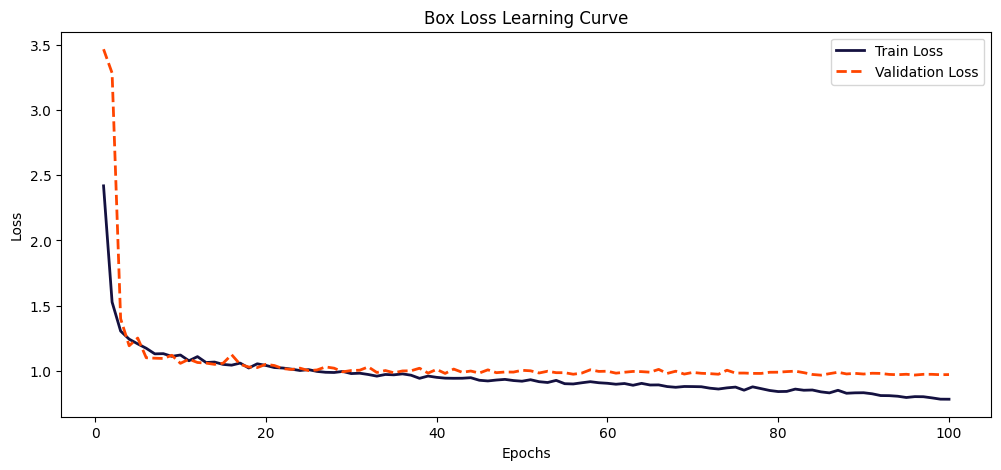

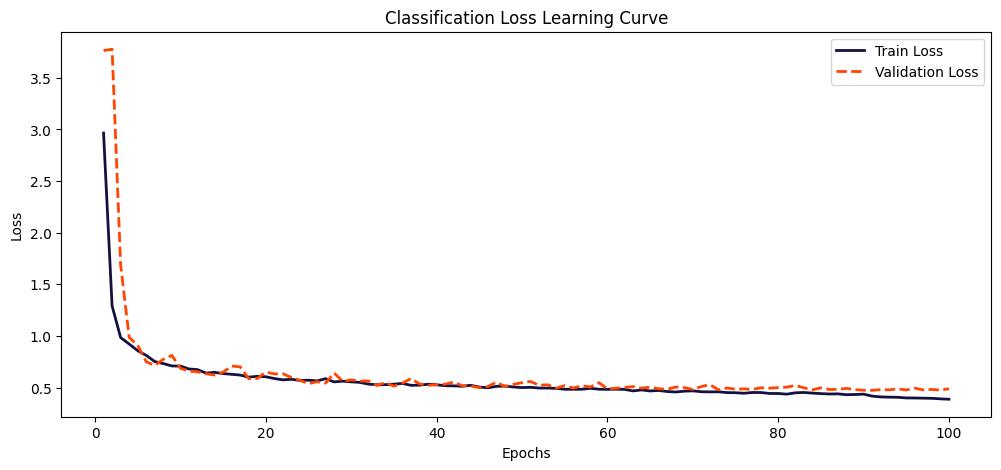

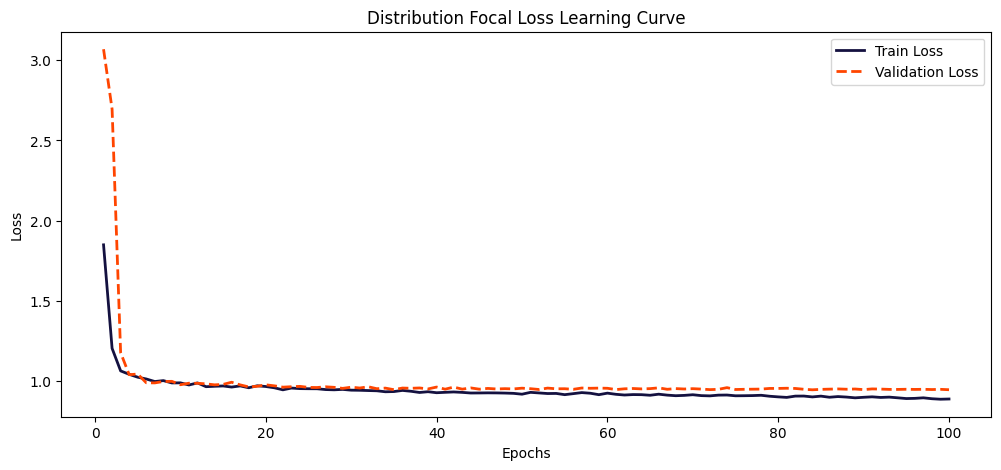

In [36]:
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

In [37]:
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')

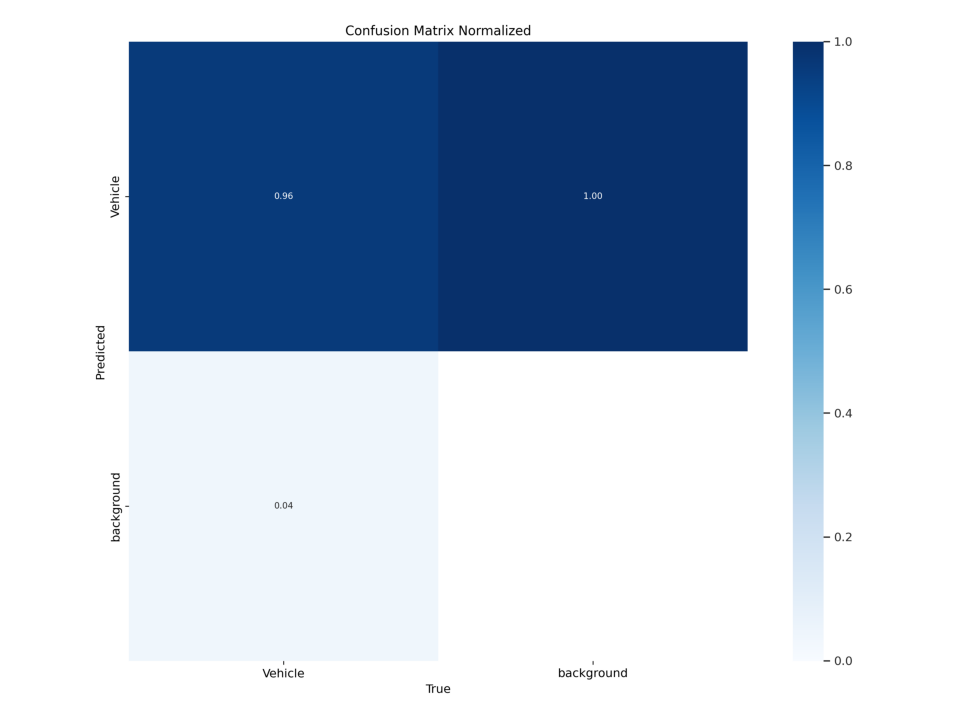

In [38]:
cm_img = cv2.imread(confusion_matrix_path)
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()

In [39]:
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

In [40]:
best_model = YOLO(best_model_path)

In [41]:
metrics = best_model.val(split='val')
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])
metrics_df.round(3)

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 844.8±150.7 MB/s, size: 61.7 KB)


val: Scanning /content/vehicle_ds/Vehicle_Detection_Image_Dataset/valid/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]


                   all         90        937      0.913      0.946      0.977      0.748
Speed: 5.1ms preprocess, 8.0ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/val


Metric Value
metrics/precision(B)         0.913
metrics/recall(B)            0.946
metrics/mAP50(B)             0.977
metrics/mAP50-95(B)          0.748
fitness                      0.771

In [42]:
valid_images_path = os.path.join(dataset_path, 'valid', 'images')
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 9)]

Text(0.5, 0.98, 'Validation Set Inferences')

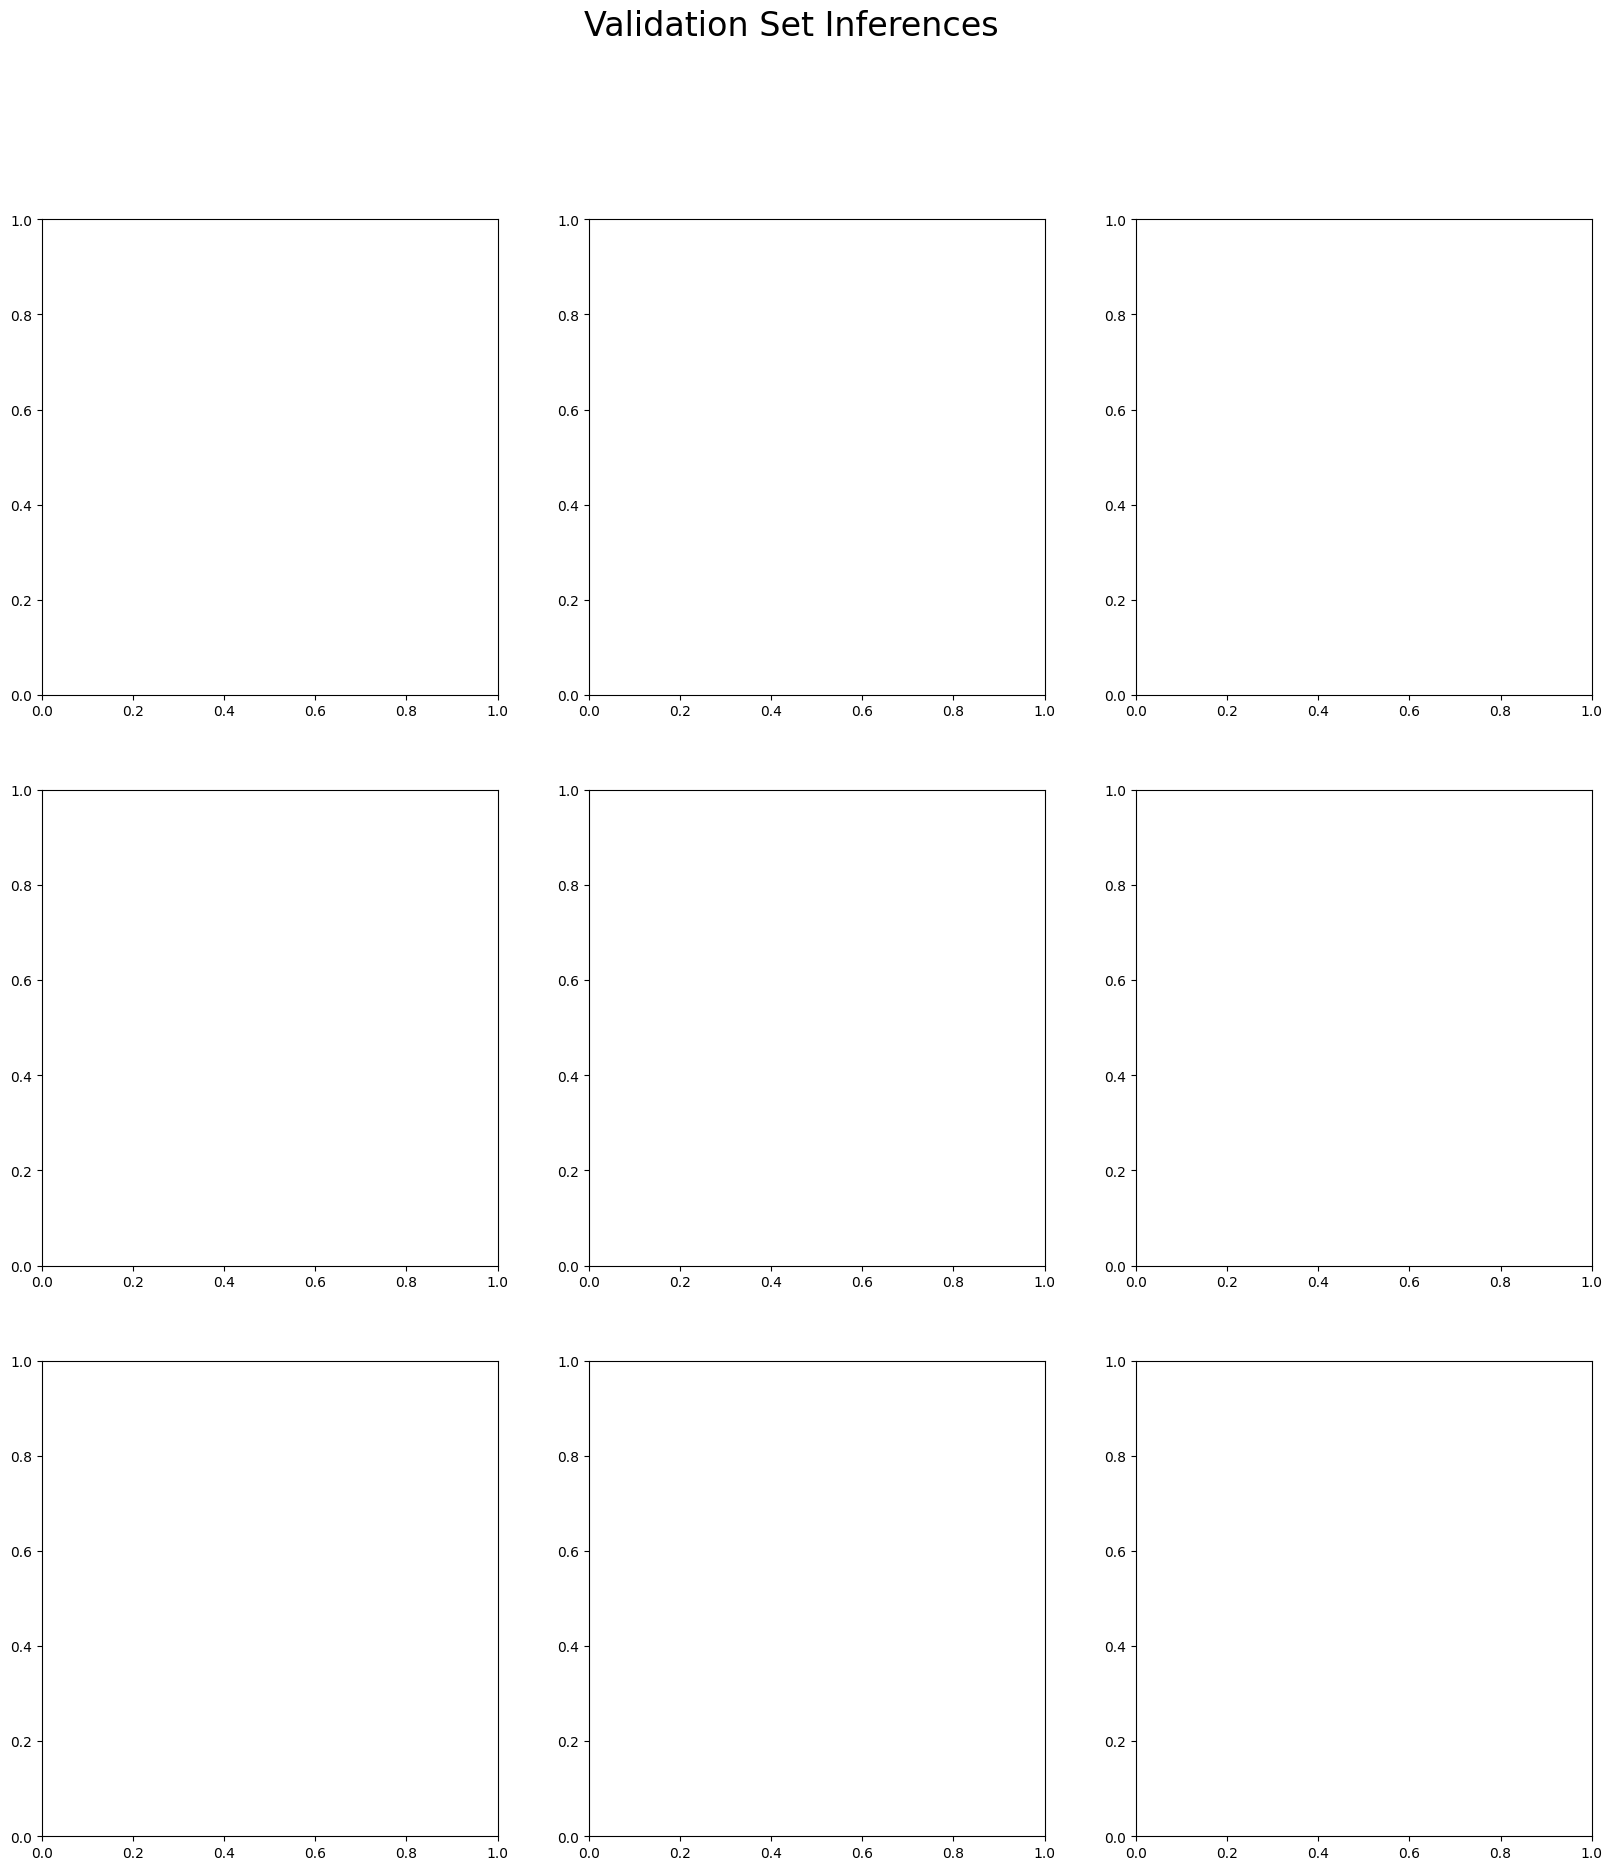

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(20, 21))
fig.suptitle('Validation Set Inferences', fontsize=24)

In [44]:
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = best_model.predict(source=image_path, imgsz=640, conf=0.5)
    annotated_image = results[0].plot(line_width=1)
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()


image 1/1 /content/vehicle_ds/Vehicle_Detection_Image_Dataset/valid/images/2_mp4-5_jpg.rf.bb490ff3835ac898dedea95c973038f5.jpg: 640x640 3 Vehicles, 7.4ms
Speed: 3.0ms preprocess, 7.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/vehicle_ds/Vehicle_Detection_Image_Dataset/valid/images/3_mp4-14_jpg.rf.6597c5732e0d554f1f07edb59abb4f8b.jpg: 640x640 1 Vehicle, 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/vehicle_ds/Vehicle_Detection_Image_Dataset/valid/images/10_mp4-16_jpg.rf.b01cbf556a5a2c4154322deda0339880.jpg: 640x640 27 Vehicles, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/vehicle_ds/Vehicle_Detection_Image_Dataset/valid/images/10_mp4-9_jpg.rf.72a35ba2f76343afc7a101e720dbbb81.jpg: 640x640 23 Vehicles, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 6

<Figure size 640x480 with 0 Axes>


image 1/1 /content/sample_image.jpg: 384x640 5 Vehicles, 12.8ms
Speed: 3.4ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


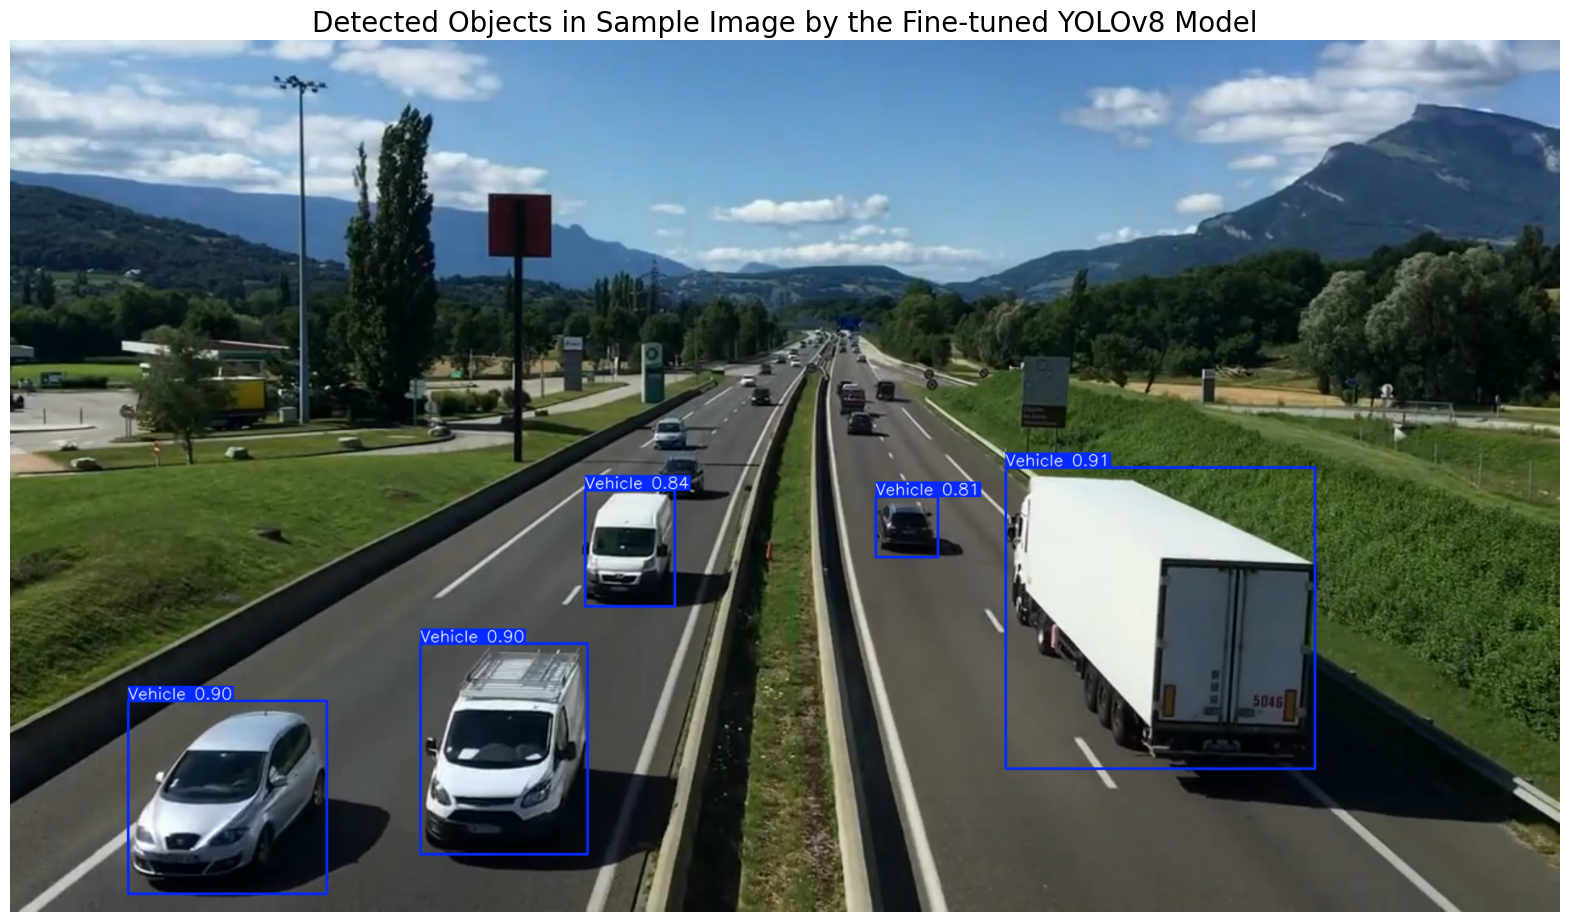

In [46]:
sample_image_path = 'sample_image.jpg'
results = best_model.predict(source=sample_image_path, imgsz=640, conf=0.7)

sample_image = results[0].plot(line_width=2)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Fine-tuned YOLOv8 Model', fontsize=20)
plt.axis('off')
plt.show()